# Group Contributions Statement
Group Members: Tecia Yang and Sanjay Verma <br>
Data Import & Cleaning was done by both members. The table, Figure 1, and discussions in Exploratory Analysis were done by Tecia. Figure 2 of Exploratory Analysis was done by Sanjay. Feature Selection was done by both members. Model 1 was done by Tecia. Model 2 was done by Sanjay. Discussions were written by Tecia and refined by Sanjay.


# Data Import and Cleaning

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np
import seaborn as sns
%matplotlib inline

In [34]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [35]:
# check data
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


After inspection of the dataset, we decide that the columns "Individual ID", "studyName" should be first taken out becuase they are defined equivalently to species. Further observation validates the removal of 'Stage' and 'Region'， which are the same for all samples. Additionally, 'Sample Number' should be dropped due to redundancy within a dataframe structure. Finally, after research on the sampling process it is determined safe to remove 'Date Egg' and 'Comments', which are irrelevant to species determination and more pertaining to the sampling process.

In [36]:
# split into training and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(penguins, test_size = 0.2, random_state = 2023) # hold out 20% of the data as test set

In [37]:
# Function to clean data

from sklearn import preprocessing
def prep_penguins_data(data_df, split=True):
    ''''
    Function that cleans data used for machine learning, specifically for "penguins". 
    Arguments:
        data_df: the dataframe; expecting either a training/test set OR a full dataset.
        split: default value = True;
               equals True if data_df is a training/test set; 
               equals False if data_df is a full dataset.
    Return: 
        split=True: cleaned training/test set split into predictor(X) and target(y) variable sets (2 dfs).
        split=False: cleaned dataset (1 df).
    '''
    df = data_df.copy()
    
    # reduce species to common names!!!!!!

    # drop irrelevant or confirmed species-indicative columns
    df = df.drop(['Date Egg'], axis = 1)      # irrelevant     
    df = df.drop(['Stage'], axis = 1)         # same for all individuals/species    
    df = df.drop(['Region'], axis = 1)        # same for all individuals/species
    df = df.drop(['Individual ID'], axis = 1) # format equivalent to species
    df = df.drop(['studyName'], axis = 1)     # equivalent to species
    df = df.drop(['Sample Number'], axis = 1) # repeated as index
    df = df.drop(['Comments'], axis = 1)      # irrelevant
    
    df=df.dropna()
    df=df[df['Sex']!='.']
    
    # Encode categorical variables: 'Sex' & 'Clutch Completion' & 'Island'
    le = preprocessing.LabelEncoder()
    
    # Encode 'Sex' -- Female=1, Male=2
    df['Sex'] = le.fit_transform(df['Sex']) 
    
    # Encode 'Clutch Completion' -- Yes=1, No=0
    df['Clutch Completion'] = le.fit_transform(df['Clutch Completion']) 
    
    # Encode 'Island' -- Biscoe=0, Dream=1, Torgersen=2
    df['Island'] = le.fit_transform(df['Island'])
    
    # Label 'Species' as integers: Adelie=0, Chinstrap=1, Gentoo=2
    df['Species'] = le.fit_transform(df['Species'])
    
    
    if split==True:
        # split into X and y sets
        X = df.drop(['Species'], axis=1)
        y = df['Species']
        return(X, y)
    else:
        return(df)

In [38]:
# SPLIT SETS INTO PREDICTOR(X) AND TARGET(y) VARIABLE SETS and CLEAN DATA
X_train, y_train = prep_penguins_data(train)
X_test,  y_test  = prep_penguins_data(test)

## Exploratory Analysis

In this part, we will first visualize the data to obtain a qualitative grasp of which factors might be better at indicating a penguin's species. The more indicative ones will provide as priority candidates for feature selection in the next part. 

In [39]:
# prepare penguins dataset for visualization
penguins0=prep_penguins_data(penguins, split=False)

## **Table: All Measurements - Individually**
### 'Island', 'Clutch Completion', 'Culmen Depth (mm)', 'Culmen Length (mm)', 'Body Mass (g)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',	'Delta 13 C (o/oo)'

In [40]:
penguins0.groupby('Species').mean()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,,,
0,0.992806,0.906475,38.785612,18.323022,190.323741,3702.697842,0.489209,8.859398,-25.813557
1,1.000000,0.791045,48.788060,18.404478,195.671642,3729.850746,0.492537,9.356155,-24.557869
2,0.000000,0.940678,47.570339,14.994068,217.194915,5091.101695,0.508475,8.249349,-26.183681


### **Discussion**
This table of the mean statistics for each individual feature for every species can give a preliminary judgement on which measurements are more indicative of the penguin's species. <br>

The distribution of 'Sex' is about the same (1.5) among all three species, so that would be ruled out first. Furthermore, the 'Delta 15 N' and 'Delta 13 C' values are also close to each other (within a 10% range), as well as 'Clutch Completion', so these three statistics would have lower priority. <br>
As for 'Island', we observe that Chinstrap and Gentoo penguins solely exist on one island each (Dream:1 and Biscoe:0, respectively). Therefore, 'Island' is probably the best qualitative/categorical predictor we have. <br>
However, we will still visualize the two categorical measurements 'Clutch Completion' and 'Island' below to confirm.<br>

The remaining 4 quantitative features - 'Culmen Depth (mm)', 'Culmen Length (mm)', 'Body Mass (g)', and'Flipper Length (mm)' - all have the mean of one particular species observably different from the two others. Therefore, these quantifications of physical features might be good predictors of penguins species. <br>

However, we must find a way to differentiate them even more based on species, so below in Figure 1 we take the reasonable approach of pairing different combinations of two measurements.

## **Figure 1: Quantitative Measurements of Physical Features - Paired**
### Scatterplot of pairs in 'Culmen Depth (mm)', 'Culmen Length (mm)', 'Body Mass (g)', 'Flipper Length (mm)'

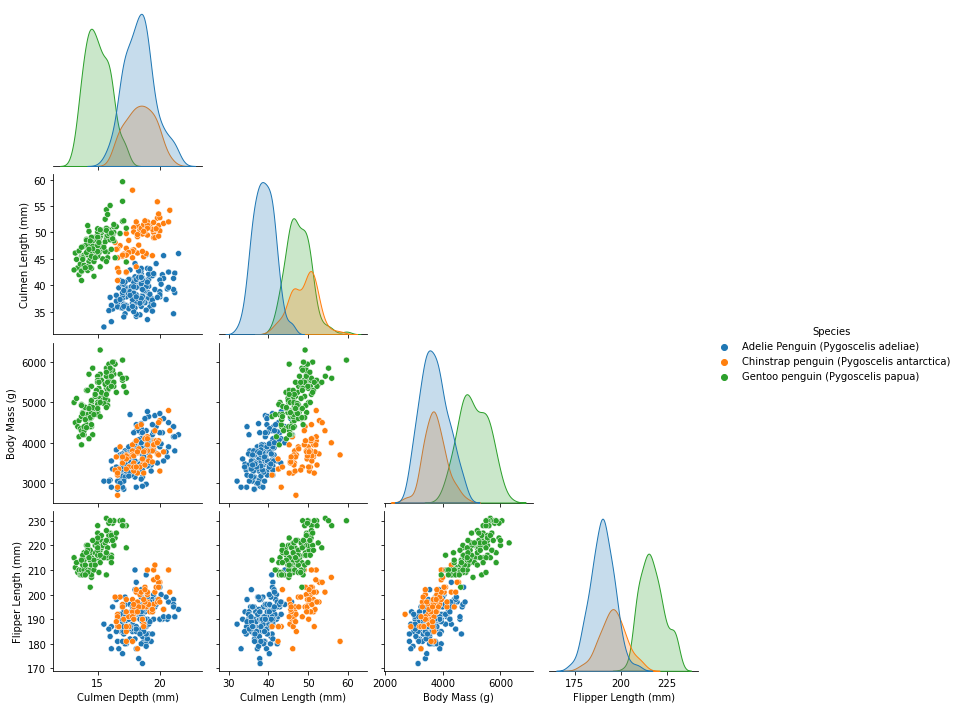

In [41]:
penguins1=penguins[['Species','Culmen Depth (mm)','Culmen Length (mm)','Body Mass (g)','Flipper Length (mm)']]
sns.pairplot(penguins1, hue="Species", corner=True)

### **Discussion**
In this figure, we are looking at the relations between pairs of quantitative physical feature measurements for each species (color). This plot reflects the conclusions from the table we made above. It is also worthy to mention that from the univariate distribution plots on the diagonal show that every single variable considered here can probably not serve as a single predictor of species because the overlappings between different species are rather large. Therefore, a pairwise approach (using two quantitative variables) is necessary. <br>

More overlapping of differently colored points in a subplot of a variable pair means that these two variables are not good indicators of a clear defined group for each species. On the other hand, more separation and clearly-defined clusters of same-colored points means that the variables used are more within a unique range for each species, and thus may serve as good predictor variables. <br>

In this pairplot, the observably better pairs of species indicator-variables are:
1. Culmen Depth vs. Culmen Length      (1,3)
2. Culmen Length vs. Body Mass         (2,2)
3. Culmen Length vs. Flipper Length    (1,2)


[Text(0.5, 1.0, "Distribution of 'Clutch Completion'")]

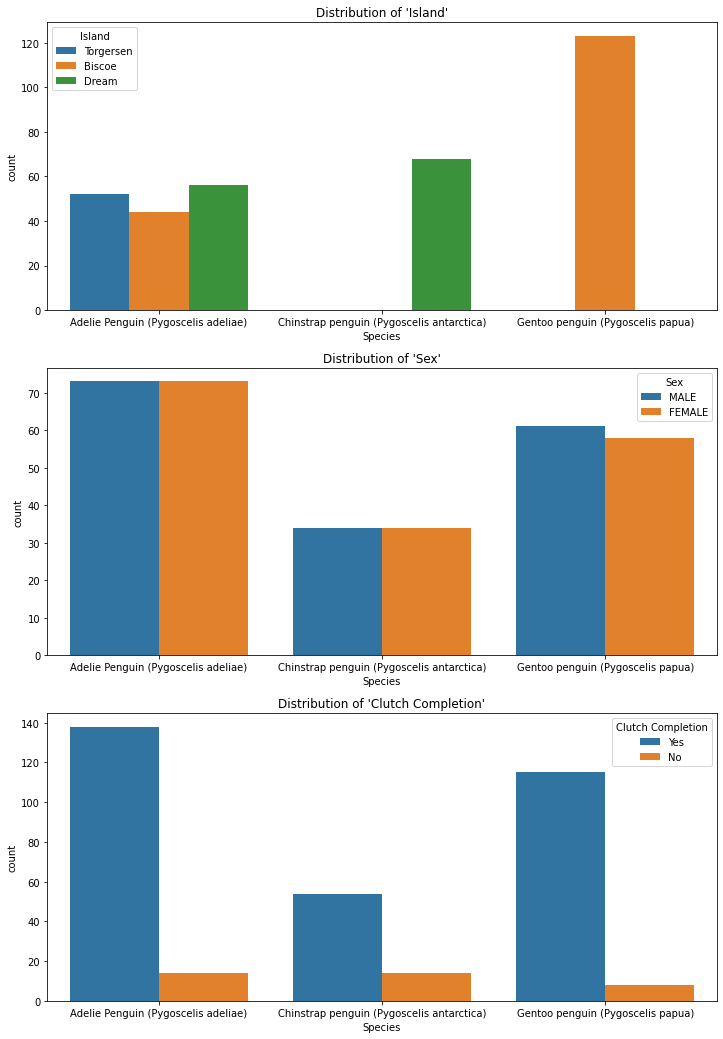

In [42]:
penguins=penguins[penguins['Sex']!='.']
fig, ax = plt.subplots(3,1,figsize=(12,18))
island_plot = sns.countplot(x='Species', hue='Island', data=penguins, ax=ax[0])
sex_plot = sns.countplot(x='Species', hue='Sex', data=penguins, ax=ax[1])
sex_plot = sns.countplot(x='Species', hue='Clutch Completion', data=penguins, ax=ax[2])
ax[0].set(title="Distribution of 'Island'")
ax[1].set(title="Distribution of 'Sex'")
ax[2].set(title="Distribution of 'Clutch Completion'")

### **Discussion**
In Figure 2 above, a detailed visualization demonstrates that 'Sex' distribution was about the same (50/50) among different species and that there was a high rate of 'Clutch Completion' in all three species. This supports the conclusion that 'Clutch Completion' and 'Sex' are not good 'Species' indicators as observed in the table before.<br>
On the other hand, 'Island' distribution is observably unique to species. Chinstrap penguins only exist on Dream Island while Gentoo penguins only exist on Biscoe Island. Adelie penguins are almost evenly distributed all three islands (Torgersen, Dream and Biscoe). <br> Therefore, 'Island' will be the qualitative element used in the machine learning models.

# **Feature Selection - test selected pairs**

From the explanatory analysis we confirm that 'Island' will be the best quantitative element to use for modeling. <br>
However, we need to select a pair of quantitative features from the three candidates in Figure 1 to complement the model. <br>
Here we will test each selected pair of quantitative features in addition to the qualitative feature "Island" to determine which combination is the best. <br>
We will use a support vector machine model to choose the pair with the best cross-validation score on the training data.


In [43]:
from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

colpairs=[['Island','Culmen Depth (mm)','Culmen Length (mm)'],['Island','Body Mass (g)','Culmen Length (mm)'],['Island','Culmen Length (mm)','Flipper Length (mm)']]
def best_col_pair(colpair_list):
    """
    Trains and evaluates the best predictor column combination with a support vector machine model via cross-validation
    Arguments:
      model: training model
      X: predictor training dataset
      y: target training dataset
      colpair_list: list of combinations of columns to test
    Return: 
      best cross-validation score, corresponding list of predictor columns
    """
    
    #MLR = LogisticRegression(multi_class='multinomial')
    model = SVC(kernel='rbf')
    best_cv = 0
    best_cols = None
    
    for i in colpair_list:
        print("Training with columns: " + str(i))
        
        # drop rows with NaN values 
        X_train_copy=X_train[i]
        X_train_copy.dropna()
        
        # 10-fold cross validation, compare for highest cv score
        cv = cross_val_score(model, X_train_copy, y_train, cv = 10).mean()
        print(' - CV score = '+str(cv))
        if cv > best_cv:
            best_cv = cv
            best_cols = i
            
    return best_cv, best_cols

In [44]:
# Feature Selection 
best_cv, best_cols = best_col_pair(colpairs)
print('—— The best combination of columns is ' + str(best_cols) + ', with a cross-validation score of ' + str(best_cv))

Training with columns: ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']
 - CV score = 0.9192307692307693
Training with columns: ['Island', 'Body Mass (g)', 'Culmen Length (mm)']
 - CV score = 0.7115384615384615
Training with columns: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
 - CV score = 0.7692307692307692
—— The best combination of columns is ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)'], with a cross-validation score of 0.9192307692307693


### **Discussion**
- **Feature Selection Decision:** the columns that will be used for the machine learning model are **['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']**, which had the highest cross-validation score.
- In the exploratory analysis section, preliminary data visualization and analysis showed that 'Island' was probably the best qualitative indicator of 'Species', because the table and Figure 2 showed that the averages of 'Clutch Completion' and 'Sex' were almost the same between different species. <br> Therefore, in this feature selection section the fixed qualitative element used was 'Island'.
- A support vector machine model was used to determine the the best pair of qualitative elements because the target variable 'Species' is categorical and non-binary (has more than 2 groups). Performing cross-validation on the training data helped optimize the results of each combination's performance.

# Modeling

## Model 1 - Support Vector Machines (SVM) 

Support Vector Machine is one of the most popular Supervised Learning algorithms, typically used for Classification problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily classify a new data point in the correct category. 

SVM chooses the extreme points/vectors termed support vectors to create the best decision boundaries. Hence the name  Support Vector Machine.

### 1) Cross-Validation: Choose Complexity Parameters - C & gamma  
* C: regularization/margin softness parameter <br>
* gamma: a multiplier that is a regularization parameter within the kernel calculation; the higher, the tighter fit to data <br>

*Goal: to optimize model performance* <br> 
**We choose the support vector classification (SVC) model and apply the most prevalently used'rbf' kernel**

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import patches as mpatches
from sklearn.svm import SVC

In [46]:
# training predictor set: one qualitative and two quantitative features - 'Island', 'Culmen Depth (mm)', 'Culmen Length (mm)'
X_train=X_train[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
# testing predictor set has the same columns
X_test=X_test[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]

In [47]:
best_score = 0
cvscores=[]
for C_val in [round(n*0.2,1) for n in range(2,11)]:
    cvscoresline=[]
    for gamma_val in np.arange(0.5,4,0.5):
        model = SVC(kernel='rbf', gamma=gamma_val, C=C_val)
        cv_score = cross_val_score(model, X_train, y_train, cv=10).mean()
        cvscoresline.append(cv_score)
        if cv_score > best_score:
            best_score = cv_score
            best_gamma = gamma_val
            best_C = C_val
    cvscores.append(cvscoresline)

[Text(0.5, 15.0, 'gamma values'),
 Text(33.0, 0.5, 'C values'),
 Text(0.5, 1.0, 'SVC Complexity Parameter Optimization Analysis')]

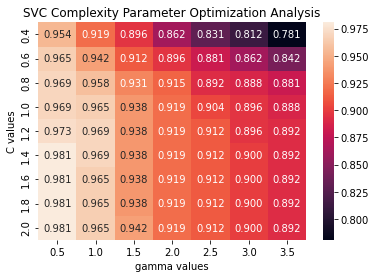

In [48]:
# Heatmap to show cv scores for different complexity parameters 
Cvals=[round(n*0.2,1) for n in range(2,11)]
gammavals=np.arange(0.5,4,0.5)
s=sns.heatmap(data=cvscores, yticklabels=Cvals, xticklabels=gammavals, annot=True, fmt=".3f")
s.set(xlabel='gamma values', ylabel='C values', title = 'SVC Complexity Parameter Optimization Analysis')

In [49]:
print('The best C value is: ' + str(best_C))
print('The best gamma value is: ' + str(best_gamma))
print('The highest mean cross-validation score from these hyperparameters is: ' + str(best_score))

The best C value is: 1.4
The best gamma value is: 0.5
The highest mean cross-validation score from these hyperparameters is: 0.9807692307692308


**The optimal complexity parameters for the SCV model are: C = 1.4 and gamma = 0.5.** <br>
We will use these hyperparameters for our SCV model below.

### 2) Evaluation on Test-Data: 

Here we will train the SCV model on the training data, and evaluate its accuracy directly and with a confusion matrix.
Note: In the data import & prep section, we have already split the dataset to hold out 20% as the test set

In [50]:
# train a SVM classifier with the determined optimal complexity parameters on the training dataset
model = SVC(kernel='rbf', gamma=0.5, C=1.4)
model.fit(X_train.values, y_train.values)

SVC(C=1.4, gamma=0.5)

In [51]:
# evaluate the classifier on the test set
def evaluate_model_on_testdata(model):
    '''
    Evaluates a fitted model on the test data
    Return: a set of predicted y's (target data)
    '''
    y_pred = model.predict(X_test.values)
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    return y_pred
          
def create_confusion_matrix(y_pred):
          cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                            index = ['Actual ' + str(i) for i in np.unique(penguins['Species'])],
                            columns = ['Predicted ' + str(i) for i in np.unique(penguins['Species'])])
          display(cm)

In [52]:
print('Result: Model Prediction on Test Data')
y_pred=evaluate_model_on_testdata(model)
print('Confusion Matrix:')
create_confusion_matrix(y_pred)

Result: Model Prediction on Test Data
Accuracy: 0.984
Confusion Matrix:


,Predicted Adelie Penguin (Pygoscelis adeliae),Predicted Chinstrap penguin (Pygoscelis antarctica),Predicted Gentoo penguin (Pygoscelis papua)
Actual Adelie Penguin (Pygoscelis adeliae),28,0,0
Actual Chinstrap penguin (Pygoscelis antarctica),1,9,0
Actual Gentoo penguin (Pygoscelis papua),0,0,26


### 3) Decision Region Visualization

In [53]:
# X=penguins[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
X = prep_penguins_data(penguins, split=False)[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
y = prep_penguins_data(penguins, split=False)[['Species']]

In [54]:
def plot_regions(c, X, y):
    '''
    function to plot decision regions of a machine learning model
    Arguments:
        c: trained model
        X: predictor variable dataset
        y: target variable dataset
    '''
    
    uniqueQualValues = [int(i) for i in np.unique(X['Island'])] # as list of integers (encoded)

    fig, ax = plt.subplots(3, 1, figsize = (7.5, 15))
        
    # for convenience, give names to the two columns of the data
    x0 = X['Culmen Depth (mm)']
    x1 = X['Culmen Length (mm)']
    
    # Encoded 'Species' as integers: Adelie=0, Chinstrap=1, Gentoo=2
    color_encode={0:'red', 1:'green', 2:'blue'}
    island_encode={0:'Biscoe', 1:'Dream', 2:'Torgersen'}
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    
    # extract model predictions, using the np.c_ attribute to join together the two parts of the grid. 
    # array.ravel() converts an multidimensional array into a 1d array,
    # we use array.reshape() to turn the resulting predictions p back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    
    for i in uniqueQualValues:
        # predict the class of each point in the meshgrid
        XY = np.c_[np.ones(XX.ravel().shape) * 1.0 * i, XX, YY]
        p = c.predict(XY)
        p = p.reshape(xx.shape)

        # use contour plot to visualize the predictions
        ax[i].contourf(xx, yy, p, cmap = "jet_r", alpha = 0.2)
        
        # plot the data
        # plot test data as scatterplot - colors of dots indicate species
        ax[i].scatter(X_test[X_test['Island']==i]['Culmen Depth (mm)'], 
                      X_test[X_test['Island']==i]['Culmen Length (mm)'], 
                      c = ([color_encode[i] for i in tuple(y_test[X_test['Island']==i].values)]), 
                      )

        ax[i].set(xlabel = "Culmen Depth (mm)", 
               ylabel = "Culmen Length (mm)")
        ax[i].set_title('Qualitative Feature Value: \'Island\' = ' + island_encode[i])
    
    # Encoded 'Species' as integers: Adelie=0, Chinstrap=1, Gentoo=2 AND color_encode={0:'red', 1:'green', 2:'blue'}
    legend0 = mpatches.Patch(color = 'red', label = 'Adelie', alpha = 0.2)
    legend1 = mpatches.Patch(color = 'green', label = 'Chinstrap', alpha = 0.2)
    legend2 = mpatches.Patch(color = 'blue', label = 'Gentoo', alpha = 0.2)
    fig.legend(handles = [legend0, legend1, legend2],loc = (0.8,0.91), fontsize = 'medium',framealpha = 1)

    plt.suptitle('Decision Regions: Test Set')
#     plt.tight_layout()
    plt.show()

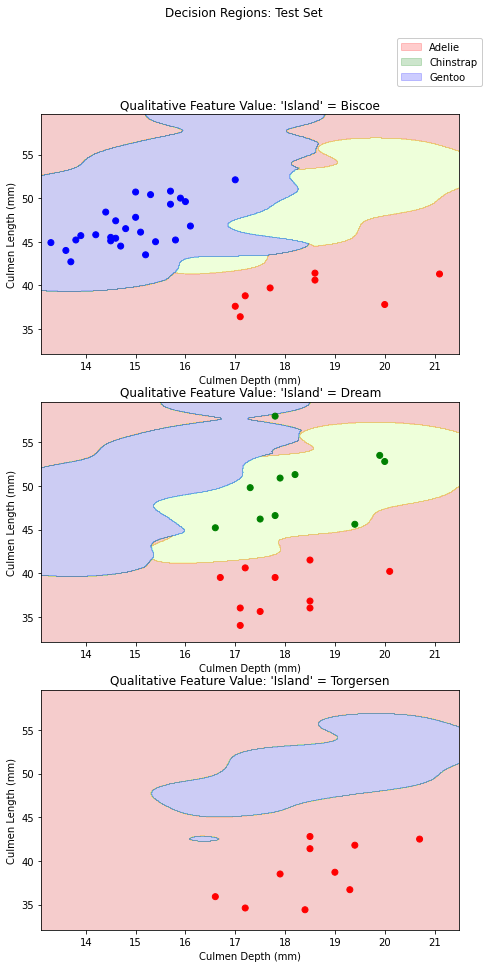

In [55]:
# plot decision regions for SVC model on test data
plot_regions(model, X, y)

### 4) Discussion of Model Prediction Mistakes

From the confusion matrix, we see the only wrong prediction the model made on the testing data is an actual Chinstrap penguin predicted as an Adelie penguin. In the decision region plot, we see the corresponding dot at the top of the second graph (for 'Island' = Dream). We also see that this dot is relatively far and segregated from the other actual Chinstrap penguins, which means that the penguin's quantitative features being used in the model were significantly different. This distance could have been outside the C-value softness parameter of the SVC model, which could be the reason this "outlier" Chinstrap penguin was placed into the decision region of the Adelie penguins.

## Model 2 - Multinomial Logistic Regression (MLR) 

The multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predict probability distribution to a multinomial probability distribution to support multi-class classification problems.

### 1) Cross-Validation: Choose Complexity Parameters - C & gamma  
* C: regularization/margin softness parameter <br>
* tol: tolerance for stopping criteria <br>

*Goal: to optimize model performance* <br> 

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
train, test = train_test_split(penguins, test_size = 0.2, )
X_train, y_train = prep_penguins_data(train)
X_test,  y_test  = prep_penguins_data(test)
# training predictor set: one qualitative and two quantitative features - 'Island', 'Culmen Depth (mm)', 'Culmen Length (mm)'
X_train=X_train[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
# testing predictor set has the same columns
X_test=X_test[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]

In [58]:
best_score = 0
cvscores=[]
for C_val in [round(n*0.2,1) for n in range(2,25)]:
    cvscoresline=[]
    for tol_val in np.arange(0.5,4,0.5):
        model = LogisticRegression(tol = tol_val, C=C_val, max_iter=1000,random_state=2023,multi_class = 'multinomial')
        cv_score = cross_val_score(model, X_train, y_train, cv=10).mean()
        cvscoresline.append(cv_score)
        if cv_score > best_score:
            best_score = cv_score
            best_tol = tol_val
            best_C = C_val
    cvscores.append(cvscoresline)

[Text(0.5, 15.0, 'tolerance values'),
 Text(33.0, 0.5, 'C values'),
 Text(0.5, 1.0, 'MLR Complexity Parameter Optimization Analysis')]

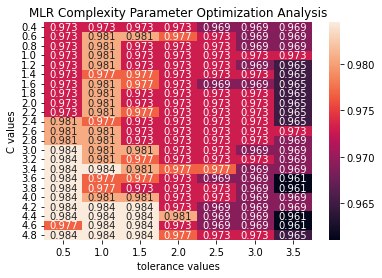

In [59]:
Cvals=[round(n*0.2,1) for n in range(2,25)]
tolvals=np.arange(0.5,4,0.5)
s=sns.heatmap(data=cvscores, yticklabels=Cvals, xticklabels=tolvals, annot=True, fmt=".3f")
s.set(xlabel='tolerance values', ylabel='C values', title = 'MLR Complexity Parameter Optimization Analysis')

In [60]:
print('The best C value is: ' + str(best_C))
print('The best tolerance value is: ' + str(best_tol))
print('The highest mean cross-validation score from these hyperparameters is: ' + str(best_score))

The best C value is: 3.0
The best tolerance value is: 0.5
The highest mean cross-validation score from these hyperparameters is: 0.9844615384615384


We will use these hyperparameters for our MLR model below.

### 2) Evaluation on Test-Data: 

Here we will train the MLR model on the training data, and evaluate its accuracy directly and with a confusion matrix.

In [61]:
train, test = train_test_split(penguins, test_size = 0.2, random_state = 2023)
X_train, y_train = prep_penguins_data(train)
X_test,  y_test  = prep_penguins_data(test)
X_train=X_train[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]
X_test=X_test[['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]

In [62]:
# train a MLR model with the determined optimal complexity parameters on the training dataset
model = LogisticRegression(random_state=2023, tol= best_tol, C=best_C, multi_class = 'multinomial', max_iter = 1000)
model.fit(X_train.values, y_train.values)

LogisticRegression(C=3.0, max_iter=1000, multi_class='multinomial',
                   random_state=2023, tol=0.5)

In [63]:
print('Result: Model Prediction on Test Data')
y_pred=evaluate_model_on_testdata(model)
print('Confusion Matrix:')
create_confusion_matrix(y_pred)

Result: Model Prediction on Test Data
Accuracy: 0.969
Confusion Matrix:


,Predicted Adelie Penguin (Pygoscelis adeliae),Predicted Chinstrap penguin (Pygoscelis antarctica),Predicted Gentoo penguin (Pygoscelis papua)
Actual Adelie Penguin (Pygoscelis adeliae),28,0,0
Actual Chinstrap penguin (Pygoscelis antarctica),1,8,1
Actual Gentoo penguin (Pygoscelis papua),0,0,27


### 3) Decision Region Visualization

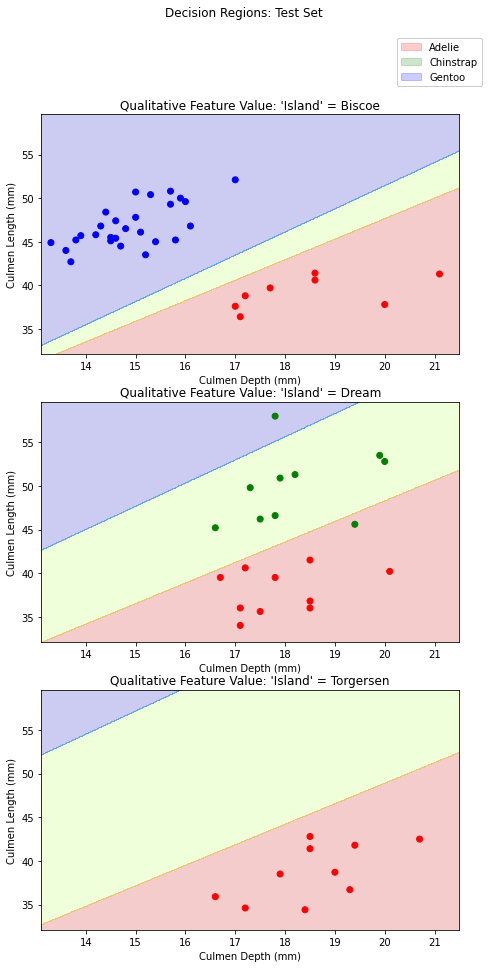

In [64]:
# plot decision regions of MLR model on test data
plot_regions(model, X, y)

### 4) Discussion of Model Prediction Mistakes

From the confusion matrix, we see that there are two wrong predictions: an actual Chinstrap penguin predicted as an Adelie penguin and an actual Chinstrap penguin predicted as a Gentoo penguin. In the decision region plot, we see the corresponding dots at the very top and bottom of the second graph (for 'Island'=Dream). Both dots are relatively far and segregated from the other actual Chinstrap penguins; These penguins' Culmen Length and Culmen Depth were significantly different from the other Chinstrap penguins. These distances probably were outside the C-value softness parameter of the linear decision regions of the MLR model, which could be why these two wrong predictions occurred. 

# Discussion

The Support Vector Classification (SVC) model had a prediction accuracy of 0.985 on the testing datset. The Multinomial Linear Regression (MLR) model had a prediction accuracy of 0.969. Both performed relatively well.<br> 
In the decision regions plots, the visualized decision boundaries demonstrate that the SVC model has a more complex (non-linear) classification boundary than the linear ones of the MLR, which accomodates the clustered-shape data regions better. This is also reflected by the higher prediction accuracy of the SVC model. Therefore, at least between the two models discussed here, the SVC model would be expected to perform better on the penguin dataset. However, it should be noted that the SVC model seems to assume one class as the main decision/background (as seen in the decision regions), so there is still room for refinement.  <br>
Preliminary data visualization and selection in the explanatory analysis and further narrowing down using cross-validation in feature selection showed that a highly predictive set of three features of the penguin dataset is 'Island', 'Culmen Depth', and 'Culmen Length'. <br>
More data samples (penguin individuals) would benefit hyperparameter selection and model training. Specifically, the feature clusters of each species would be more defined and concentrated, balancing the effect of outliers. Figure 2 of the explanatory analysis also showed that within the penguin dataset, the only species-indicative qualitative/categorical variable is 'Island'. If more qualitative measurements were taken, such as diet and habitat location, they might provide as other species-indicative categorical features. In feature selection, another pair of relatively well-defined quantitative measurement pair might be chosen in combination if a new good qualitative feature is used. To some degree, the chosen pair 'Culmen Depth' and 'Culmen Length' for the models here might only work well with the selected qualitative feature 'Island'. The other pairs are not necessarily less indicative of species- it depends on the model and/or qualitative feature used.